This guide was generated using the raterio [Rasterio Python Quickstart](https://rasterio.readthedocs.io/en/latest/quickstart.html) as a base  

Example files from:
* [geotiff_sample.tif](https://github.com/mommermi/geotiff_sample)

In [36]:
geotif_filepath = r'example_data/geotiff_sample.tif' 

## Visualize example file

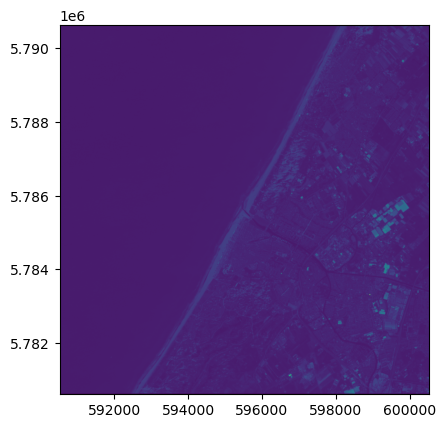

<Axes: >

In [37]:
from rasterio.plot import show

img = rasterio.open(geotif_filepath)
show(img)

## Opening a dataset in reading mode

In [1]:
import rasterio

In [2]:
rasterio.__version__

'1.4.3'

In [3]:
dataset = rasterio.open(geotif_filepath)

In [4]:
dataset.name

'example_data/geotiff_sample.tif'

In [5]:
dataset.mode

'r'

In [6]:
dataset.closed

False

In [7]:
dataset.count

3

In [8]:
dataset.width

1001

In [9]:
dataset.height

1001

In [10]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint16', 2: 'uint16', 3: 'uint16'}

## Dataset georeferencing

In [11]:
dataset.bounds

BoundingBox(left=590520.0, bottom=5780620.0, right=600530.0, top=5790630.0)

In [12]:
dataset.transform

Affine(10.0, 0.0, 590520.0,
       0.0, -10.0, 5790630.0)

In [13]:
dataset.transform * (0, 0)

(590520.0, 5790630.0)

In [14]:
dataset.transform * (dataset.width, dataset.height)

(600530.0, 5780620.0)

In [15]:
dataset.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]')

## Reading raster data

In [16]:
dataset.indexes

(1, 2, 3)

In [17]:
band1 = dataset.read(1)

In [18]:
band1

array([[   0,  799,  788, ..., 1061, 1433, 2430],
       [   0,  774,  792, ..., 1027, 1125, 1733],
       [   0,  797,  801, ..., 1046, 1040, 1100],
       ...,
       [   0,  826,  837, ..., 1562, 1489, 1740],
       [   0,  804,  825, ..., 1553, 1582, 1619],
       [   0,    0,    0, ...,    0,    0,    0]],
      shape=(1001, 1001), dtype=uint16)

In [19]:
band1[dataset.height // 2, dataset.width // 2]

np.uint16(1614)

## Spatial indexing
Numbers changed to accomodate smaller size of sample_geotiff.tif vs example.tif

In [20]:
x, y = (dataset.bounds.left + 10000, dataset.bounds.top - 5000)

In [21]:
row, col = dataset.index(x, y)

In [22]:
row, col

(500, 1000)

In [23]:
band1[row, col]

np.uint16(1285)

In [24]:
dataset.xy(dataset.height // 2, dataset.width // 2)

(np.float64(595525.0), np.float64(5785625.0))

## Creating data

In [38]:
import numpy as np
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)